# Importação do banco de dados (atualizado)

In [1]:
#install.packages("readxl")
require(readxl)
bd<- read_excel("Analise heitor_02_10_21.xlsx",sheet = 2)
head(bd)
dim(bd) #72x40 (antes havia 71 variáveis)
str(bd)

Loading required package: readxl

Warning message:
"package 'readxl' was built under R version 3.6.3"


Caidor,Genero,idade,Nivel_social,etnia,Nivel_educacional,Freq_atividade,Criterio_AHA,Anti_hipertensivo,betabloqueador,...,Dinamometria,Berg,STS,Flexibilidade_Ms,Flexibilidade_MI,TUG_sec,DT_Sec,DT_numero_animais,quantidade_total_de_medicação,medicaçao_tipo_cardiovascular
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
sim,mulher,76,b,branco,16,3x,c,não,sim,...,17.9,54,5,-29,-33,8.90,9.1,10,8,Beta + Anti_Coag
não,mulher,73,b,branco,16,3x,b,sim,sim,...,21.0,56,12,0,0,7.11,9.0,8,8,Beta + Anti_HAS
não,mulher,75,c,branco,12,2x,b,sim,sim,...,23.5,54,7,-7,-15,7.42,8.6,7,6,Beta + Anti_Coag
sim,mulher,83,b,branco,10,sedentario,c,sim,sim,...,15.3,51,9,-22,-4,10.52,11.9,7,8,Beta + Anti_Coag + Diu
não,mulher,83,a,branco,10,3x,c,sim,sim,...,16.7,56,NA,NA,-19,9.31,13.2,9,7,Beta + Anti_Coag + Diu
não,mulher,78,a,branco,12,2x,b,sim,sim,...,19.1,56,12,NA,0,7.17,8.7,6,4,Beta + Anti_HAS


[1] 72 40

tibble [72 x 40] (S3: tbl_df/tbl/data.frame)
 $ Caidor                       : chr [1:72] "sim" "não" "não" "sim" ...
 $ Genero                       : chr [1:72] "mulher" "mulher" "mulher" "mulher" ...
 $ idade                        : num [1:72] 76 73 75 83 83 78 83 82 78 75 ...
 $ Nivel_social                 : chr [1:72] "b" "b" "c" "b" ...
 $ etnia                        : chr [1:72] "branco" "branco" "branco" "branco" ...
 $ Nivel_educacional            : num [1:72] 16 16 12 10 10 12 20 8 14 16 ...
 $ Freq_atividade               : chr [1:72] "3x" "3x" "2x" "sedentario" ...
 $ Criterio_AHA                 : chr [1:72] "c" "b" "b" "c" ...
 $ Anti_hipertensivo            : chr [1:72] "não" "sim" "sim" "sim" ...
 $ betabloqueador               : chr [1:72] "sim" "sim" "sim" "sim" ...
 $ Anticoagulante_classif       : chr [1:72] "não" "não" "não" "sim" ...
 $ Diuretico_classif            : chr [1:72] "não" "não" "não" "sim" ...
 $ medicação_tipo_mental        : chr [1:72] "antidepres

# Pré-processamento dos dados

In [2]:
bd[] <- lapply(bd, as.factor) #Transforma todo o banco de dados em fator
bd[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")] <- lapply(bd[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")], as.numeric) 
str(bd)

tibble [72 x 40] (S3: tbl_df/tbl/data.frame)
 $ Caidor                       : Factor w/ 2 levels "não","sim": 2 1 1 2 1 1 2 1 1 2 ...
 $ Genero                       : Factor w/ 2 levels "homem","mulher": 2 2 2 2 2 2 2 2 2 1 ...
 $ idade                        : num [1:72] 17 14 16 24 24 19 24 23 19 16 ...
 $ Nivel_social                 : Factor w/ 4 levels "a","b","c","d": 2 2 3 2 1 1 2 2 3 2 ...
 $ etnia                        : Factor w/ 2 levels "branco","preto": 1 1 1 1 1 1 2 1 1 1 ...
 $ Nivel_educacional            : num [1:72] 6 6 3 2 2 3 8 1 4 6 ...
 $ Freq_atividade               : Factor w/ 3 levels "2x","3x","sedentario": 2 2 1 3 2 1 2 1 1 1 ...
 $ Criterio_AHA                 : Factor w/ 2 levels "b","c": 2 1 1 2 2 1 2 1 1 2 ...
 $ Anti_hipertensivo            : Factor w/ 2 levels "não","sim": 1 2 2 2 2 2 1 1 1 2 ...
 $ betabloqueador               : Factor w/ 2 levels "não","sim": 2 2 2 2 2 2 2 1 2 2 ...
 $ Anticoagulante_classif       : Factor w/ 2 levels "não","sim": 

In [3]:
table(bd$Caidor) #(48 não e 24 sim)
BD<- na.omit(bd) 
dim(BD) #52 idosos após remoção dos Nas
table(BD$Caidor) #(33 não e 19 sim)


não sim 
 48  24 

[1] 52 40


não sim 
 33  19 

# Regressão Logística sem RFE

In [4]:
set.seed(12)
RL_model<- glm(BD$Caidor~.,data=BD, family = 'binomial')
summary(RL_model)


Call:
glm(formula = BD$Caidor ~ ., family = "binomial", data = BD)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.409e-06  -2.409e-06  -2.409e-06   2.409e-06   2.409e-06  

Coefficients: (9 not defined because of singularities)
                                                      Estimate Std. Error
(Intercept)                                         -7.935e+03  8.690e+07
Generomulher                                         8.980e+02  1.205e+07
idade                                                1.303e+01  2.436e+05
Nivel_socialb                                        1.091e+03  1.085e+07
Nivel_socialc                                        1.409e+03  1.515e+07
Nivel_sociald                                       -2.166e+03  2.586e+07
etniapreto                                          -8.992e+02  9.434e+06
Nivel_educacional                                    1.382e+02  1.830e+06
Freq_atividade3x                                    -6.624e+02  7.

# RFE-RF

Loading required package: caret

Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice




Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         2   0.6897 0.2919    0.08565 0.20655         
         3   0.7075 0.3482    0.09058 0.20640         
         4   0.6915 0.2935    0.03965 0.13622         
         5   0.7479 0.4211    0.06145 0.15355         
         6   0.7701 0.4847    0.04163 0.07592        *
         7   0.6897 0.2605    0.08565 0.23236         
         8   0.7079 0.2938    0.10342 0.27300         
         9   0.7079 0.3120    0.08102 0.22171         
        10   0.7079 0.3120    0.08102 0.22171         
        11   0.7119 0.3241    0.09233 0.24843         
        12   0.7079 0.3120    0.08102 0.22171         
        13   0.7079 0.3120    0.08102 0.22171         
        14   0.7079 0.3120    0.08102 0.22171         
        15   0.6897 0.2794    0.08565 0.22168         
        16   0.6915 0.2861    0.09918 0.23166      

[1] "Berg"                          "medicaçao_tipo_cardiovascular"
[3] "DT_Sec"                        "Diuretico_classif"            
[5] "Anticoagulante_classif"        "Fluencia_verbal"

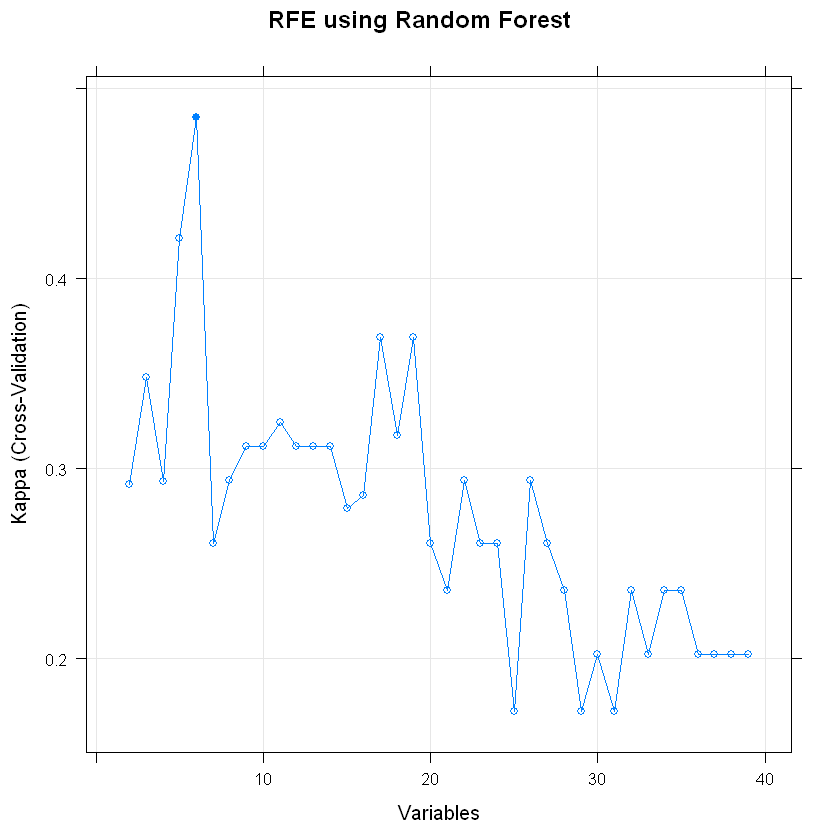

In [7]:
#define the control using a random forest selection function
#install.packages("caret")
require(caret)
#install.packages("e1071")
require(e1071)
#install.packages("randomForest")
require(randomForest)
set.seed(1)
control2 <- rfeControl(functions=rfFuncs, method="cv", number=5)
set.seed(2)
results <- rfe(BD[,2:40], BD[[1]], sizes=c(2:40),rfeControl=control2,metric="Kappa") 
print(results) 
#list the chosen features
predictors(results) 
#plot the results
plot(results, type=c("g", "o"),main="RFE using Random Forest")

## RF a partir do RFE-RF

Caidor,Berg,medicaçao_tipo_cardiovascular,DT_Sec,Diuretico_classif,Anticoagulante_classif,Fluencia_verbal
<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>
sim,11,Beta + Anti_Coag,26,não,não,17
não,11,Beta + Anti_Coag,22,não,não,5
sim,9,Beta + Anti_Coag + Diu,32,sim,sim,10
sim,11,Beta,27,não,sim,9
não,12,Beta,23,não,sim,8
não,12,Beta,8,não,não,10


Random Forest 

52 samples
 6 predictor
 2 classes: 'não', 'sim' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 42, 41, 42, 41, 42 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.6927273  0.3182279
  5     0.7145455  0.3664541
  9     0.7345455  0.4135556

Kappa was used to select the optimal model using the largest value.
The final value used for the model was mtry = 9.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 9

        OOB estimate of  error rate: 28.85%
Confusion matrix:
    não sim class.error
não  26   7   0.2121212
sim   8  11   0.4210526

rf variable importance

                                                    Overall
DT_Sec                                              100.000
Berg                                                 85.904
Fluencia_verbal                                      38.469
Anticoagulante_classifsim                            27.459
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu  23.242
Diuretico_classifsim                                 11.159
medicaçao_tipo_cardiovascularBeta + Anti_Coag         9.324
medicaçao_tipo_cardiovascularBeta + Anti_HAS          6.980
medicaçao_tipo_cardiovascularBeta                     0.000

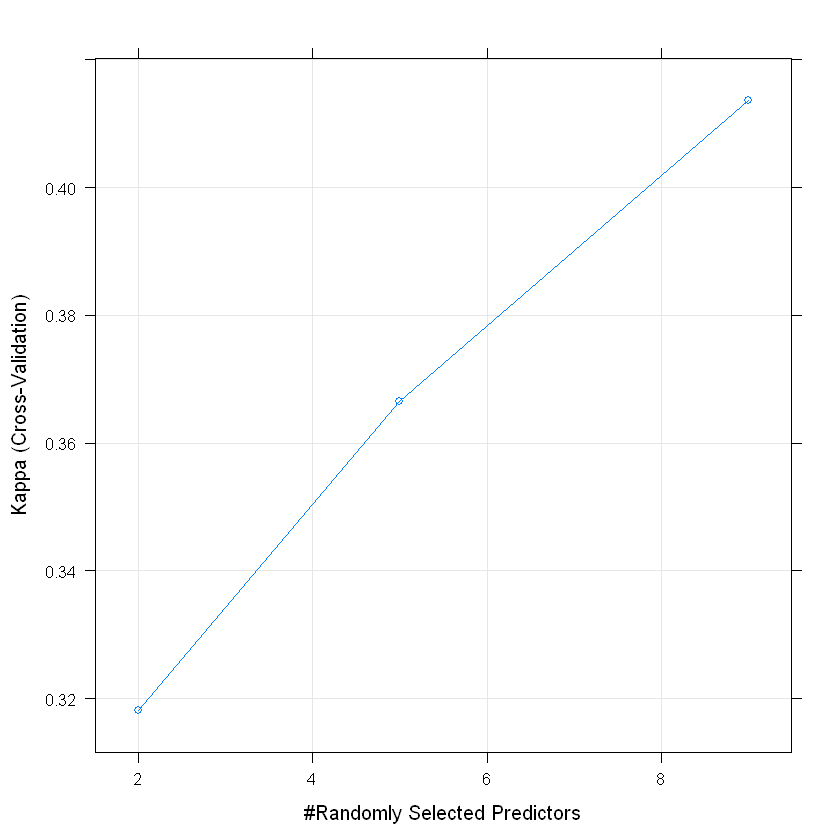

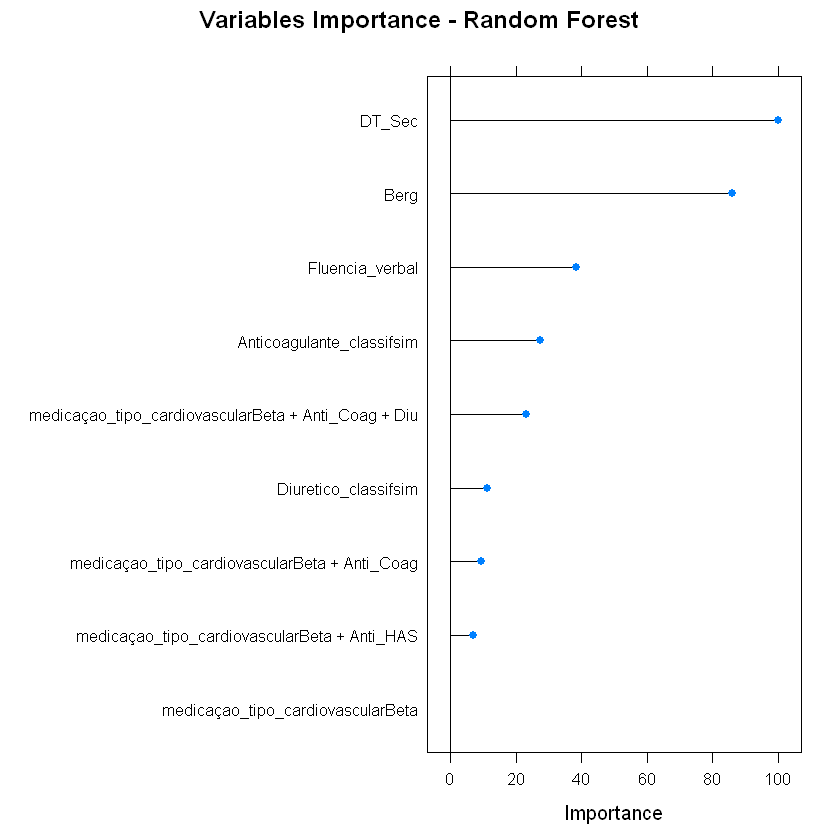

In [10]:
BD_RF_rfe<- BD[,c("Caidor","Berg",
                               "medicaçao_tipo_cardiovascular","DT_Sec","Diuretico_classif","Anticoagulante_classif","Fluencia_verbal")]
head(BD_RF_rfe)
set.seed(4)
RFmodel=train(Caidor~.,data=BD_RF_rfe,method='rf',metric=ifelse(is.factor(BD_RF_rfe$Caidor),"Kappa","RMSE"),trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
RFmodel #Acurácia= 81.42% e kappa= 59.33%
plot(RFmodel)
RFmodel$finalModel #Acurácia= 81.58% 
varImp(RFmodel)
plot(varImp(RFmodel),main="Variables Importance - Random Forest")

# RL com as variáveis resultantes do RFE-RF

In [14]:
set.seed(21)
RL_model2<- glm(BD_RF_rfe$Caidor~.,data=BD_RF_rfe, family = 'binomial')
summary(RL_model2)


Call:
glm(formula = BD_RF_rfe$Caidor ~ ., family = "binomial", data = BD_RF_rfe)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.00637  -0.36307  -0.06704   0.27439   1.94415  

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                          -12.67910 2184.60860
Berg                                                  -0.47575    0.30622
medicaçao_tipo_cardiovascularBeta                     16.50748 2184.60557
medicaçao_tipo_cardiovascularBeta + Anti_Coag         17.95017 2184.60563
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu   15.81050 2184.60582
medicaçao_tipo_cardiovascularBeta + Anti_HAS          12.70550 2184.60791
DT_Sec                                                 0.06159    0.06080
Diuretico_classifsim                                   2.28974    1.64243
Anticoagulante_classifsim                              1.36817    1.00891
Fluencia_verbal                        

# RFE-DT


Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy   Kappa AccuracySD KappaSD Selected
         2   0.6547 0.23469    0.14371  0.3280         
         3   0.6992 0.34897    0.13967  0.3253         
         4   0.7315 0.38977    0.10208  0.2474        *
         5   0.6388 0.17954    0.10511  0.2491         
         6   0.6406 0.19382    0.19021  0.4461         
         7   0.6188 0.16225    0.09550  0.2099         
         8   0.6347 0.16840    0.10193  0.2332         
         9   0.6347 0.16947    0.12051  0.2735         
        10   0.6166 0.13910    0.10940  0.2352         
        11   0.6347 0.16947    0.12051  0.2735         
        12   0.6570 0.22994    0.09197  0.2177         
        13   0.6147 0.13166    0.06424  0.1542         
        14   0.6388 0.15463    0.12321  0.3177         
        15   0.6388 0.17954    0.10511  0.2491         
        16   0.6347 0.14954    0.101

[1] "medicaçao_tipo_cardiovascular" "Berg"                         
[3] "Trilhas_b"                     "Vo2_maximo_avaliado"

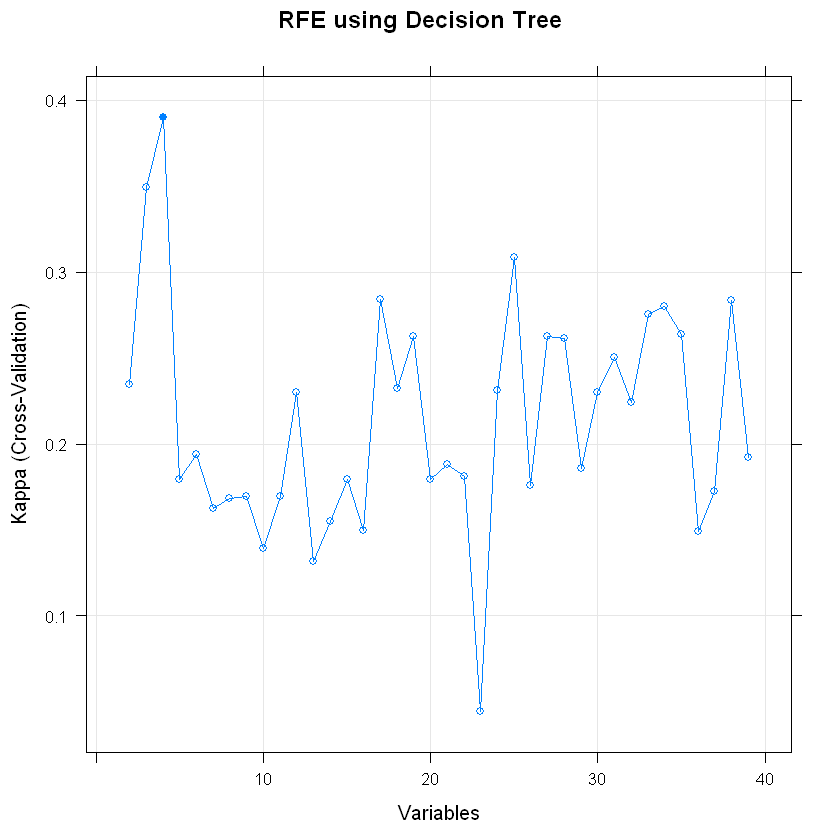

In [11]:
#The control was defined using a treebag selection function
set.seed(11)
control <- rfeControl(functions=treebagFuncs, method="cv", number=5)
set.seed(22)
results2 <- rfe(BD[,2:40], BD[[1]], sizes=c(2:40),
                rfeControl=control,metric=ifelse(is.factor(BD$Caidor),"Kappa","RMSE"))
print(results2) 
#list the chosen features
predictors(results2) 
#plot the results
plot(results2, type=c("g", "o"),main="RFE using Decision Tree")

## DT a partir do RFE-DT

Caidor,medicaçao_tipo_cardiovascular,Berg,Trilhas_b,Vo2_maximo_avaliado
<fct>,<fct>,<dbl>,<dbl>,<dbl>
sim,Beta + Anti_Coag,11,11,20
não,Beta + Anti_Coag,11,43,3
sim,Beta + Anti_Coag + Diu,9,29,5
sim,Beta,11,30,25
não,Beta,12,34,7
não,Beta,12,27,26


CART 

52 samples
 4 predictor
 2 classes: 'não', 'sim' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 42, 41, 41, 42, 42 
Resampling results across tuning parameters:

  cp         Accuracy   Kappa    
  0.0000000  0.6927273  0.2991602
  0.2105263  0.6763636  0.2819654
  0.4210526  0.6363636  0.1300174

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.

Loading required package: rpart.plot

Loading required package: rpart



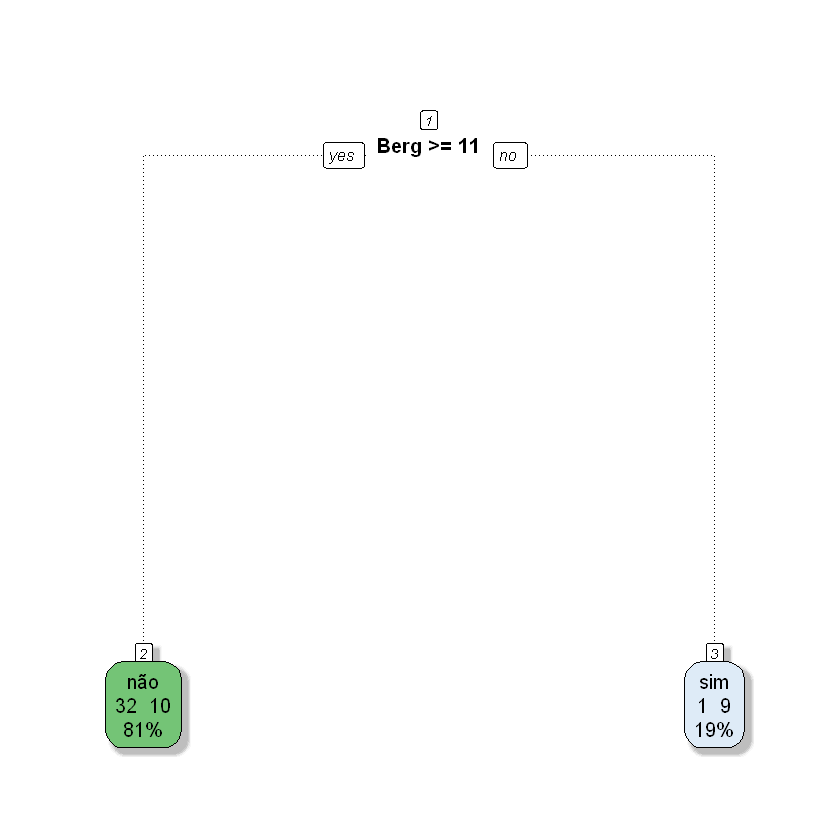

In [12]:
BD_DT_rfe<- BD[,c("Caidor","medicaçao_tipo_cardiovascular","Berg","Trilhas_b",
                                "Vo2_maximo_avaliado")]
head(BD_DT_rfe)
set.seed(44)
Tree_model=train(Caidor~.,data=BD_DT_rfe,method='rpart',metric=ifelse(is.factor(BD_DT_rfe$Caidor),"Kappa","RMSE"),trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
Tree_model #Acurácia= 72.5% e kappa = 47.17% e cp=0
#install.packages("rpart.plot")
require(rpart.plot)
rpart.plot(Tree_model$finalModel,type=0,extra=101,box.palette = "GnBu",
           branch.lty=3,shadow.col = "gray",nn=T,cex=1)

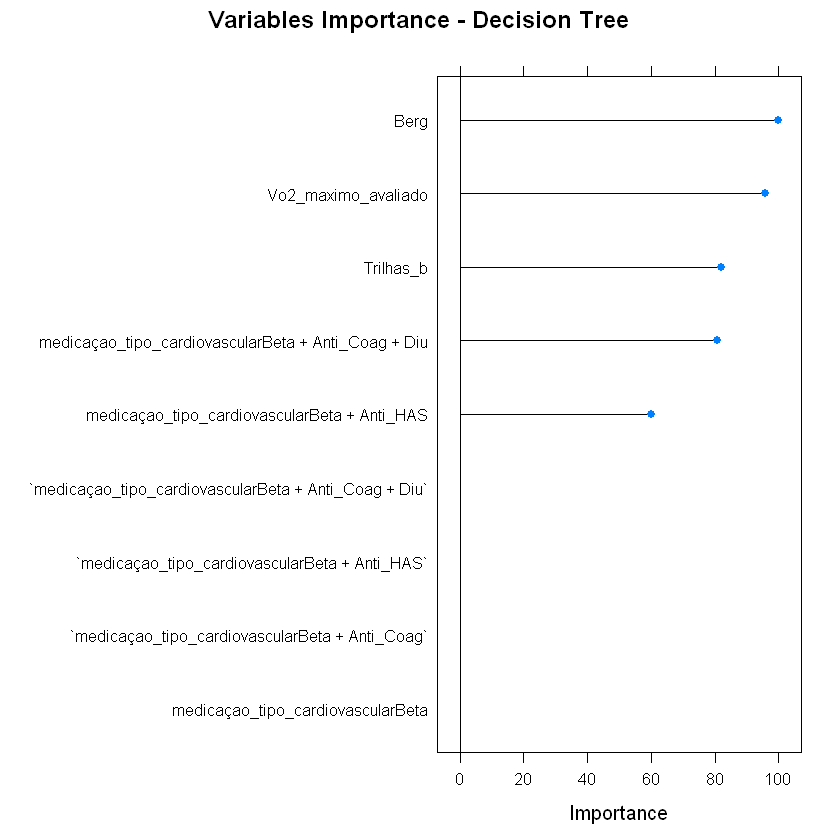

In [13]:
plot(varImp(Tree_model),main="Variables Importance - Decision Tree")